<a href="https://colab.research.google.com/github/Shymori/MulticassClassification/blob/main/Classifica%C3%A7%C3%A3o_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classificação: Resolvendo problemas multiclasse**

###**Carregando os dados**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

##EDA Análise Exploratória de dados

In [3]:
df.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

###**Entendendo os dados**

In [5]:
df['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [6]:
df.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


In [7]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']

df[colunas_categoricas].describe()


,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


O normalize irá transformar o value_counts de quantidade para porcentagem de 0 a 1.

In [8]:
df['Estado civil'].value_counts(normalize=True)*100

Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: Estado civil, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Como vimos no describe que a idade mínima é 17 e a máxima 70, podemos colocar isso no range

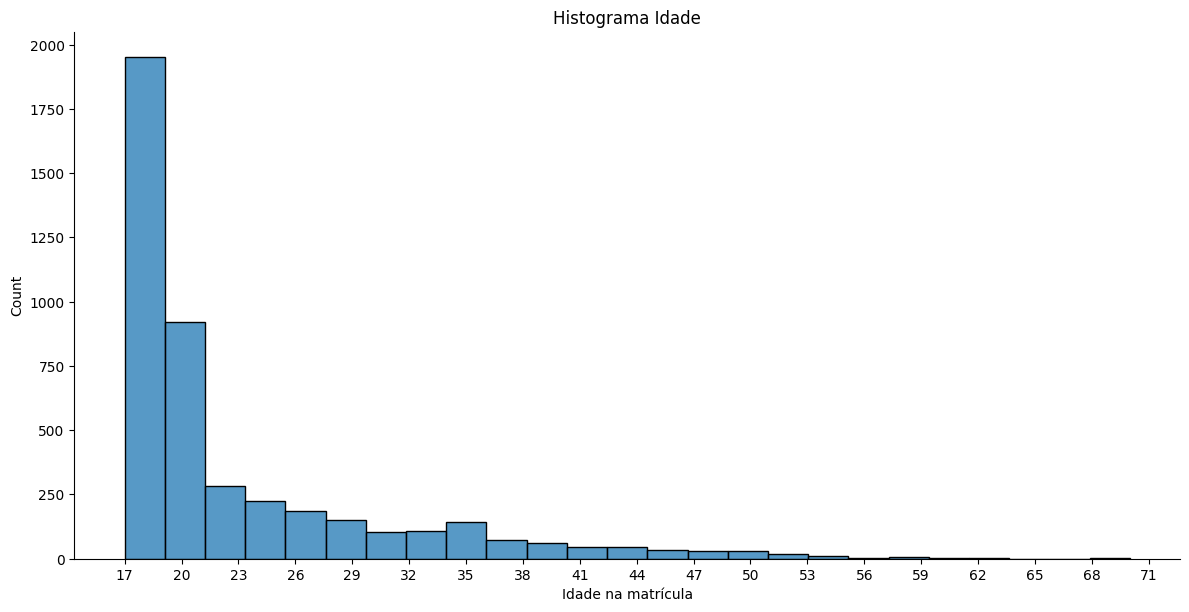

In [10]:
sns.displot(df['Idade na matrícula'],bins=25,height=6, aspect=2)
plt.title("Histograma Idade")
plt.xticks(range(17,72,3))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

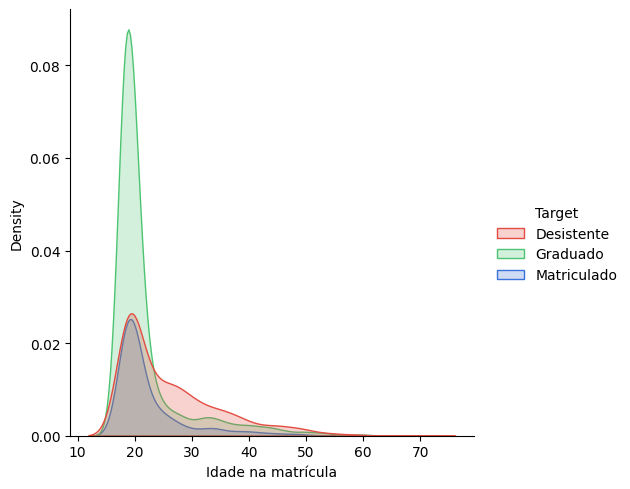

In [11]:
color_dict = {'Desistente':'#e34c42','Graduado':'#4dc471','Matriculado':'#3b71db'}
sns.set_palette(list(color_dict.values()))
sns.displot(data = df,x='Idade na matrícula',hue='Target',kind='kde',fill=True)
plt.show

In [12]:
df['Estrangeiro'].value_counts(normalize=True)*100

Não    97.513562
Sim     2.486438
Name: Estrangeiro, dtype: float64

In [13]:
df['Sexo'].value_counts(normalize=True)*100

Feminino     64.82821
Masculino    35.17179
Name: Sexo, dtype: float64

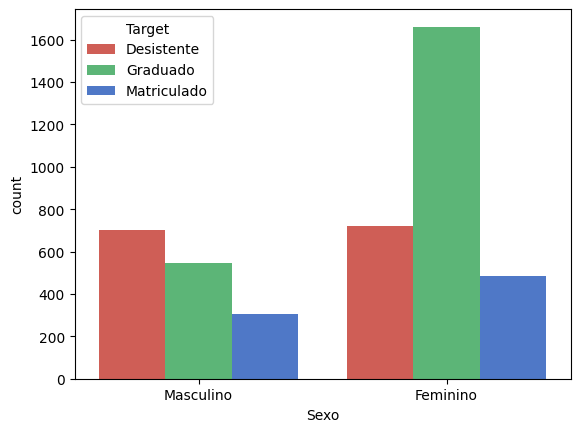

In [14]:
sns.countplot(x='Sexo',hue='Target',data=df)
plt.show()

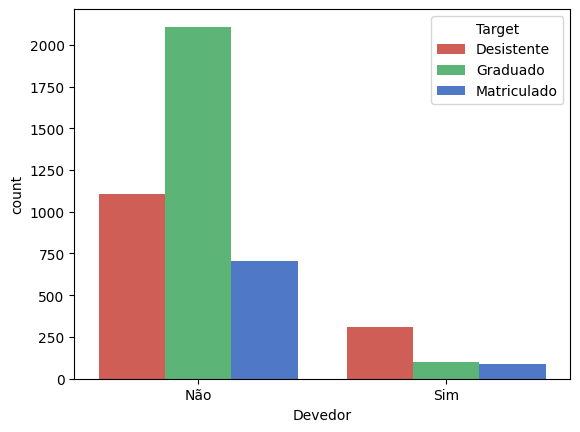

In [15]:
sns.countplot(x='Devedor',hue='Target', data=df)
plt.show()

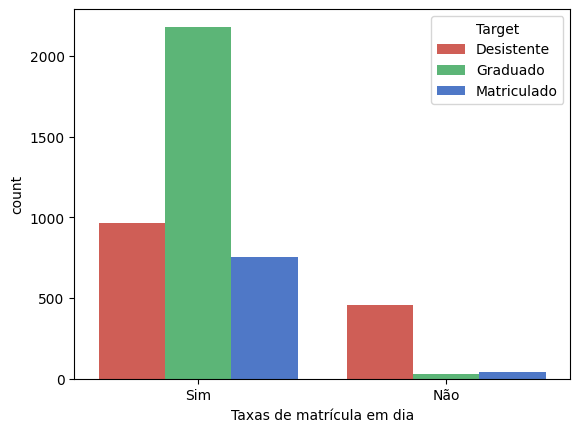

In [16]:
sns.countplot(x='Taxas de matrícula em dia',hue='Target', data=df)
plt.show()

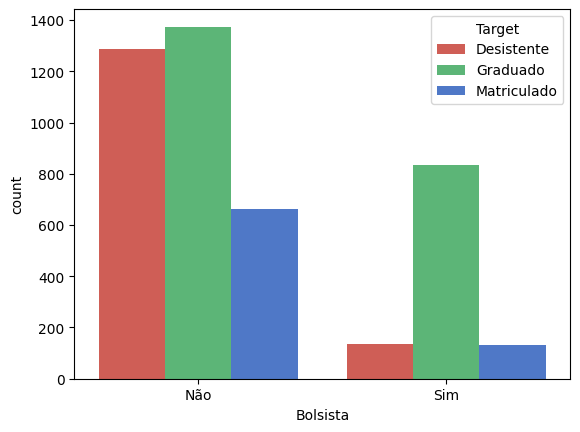

In [17]:
sns.countplot(x='Bolsista',hue='Target', data=df)
plt.show()

In [18]:
import plotly.express as px

In [19]:
contagem = df.groupby(['Curso','Target']).size().reset_index(name = 'Contagem')
contagem['porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x:(x/x.sum())*100)
fig = px.bar(contagem, y='Curso', x='porcentagem', color='Target', orientation='h',color_discrete_map = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})
fig.show()

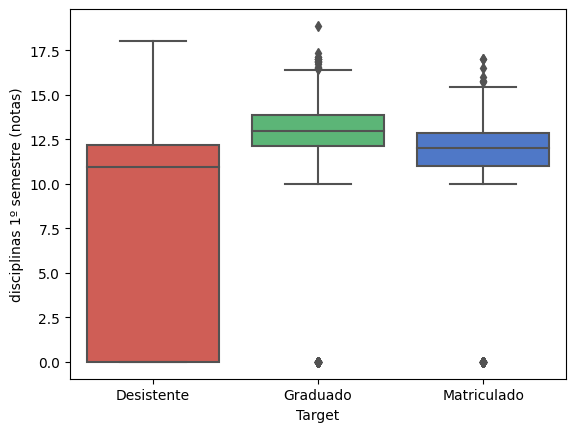

In [20]:
sns.boxplot(x='Target',y='disciplinas 1º semestre (notas)',data=df)
plt.show()

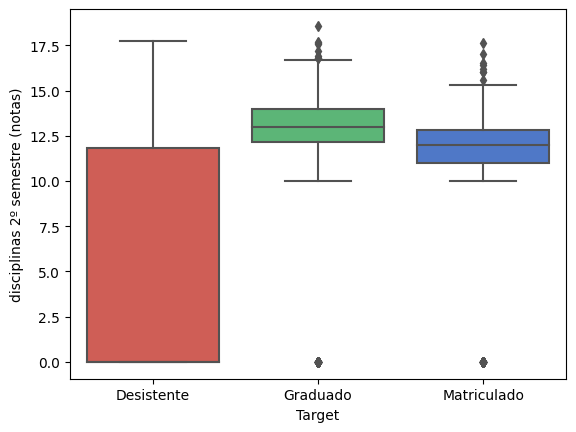

In [21]:
sns.boxplot(x='Target',y='disciplinas 2º semestre (notas)',data=df)
plt.show()

In [22]:
df['Target'].value_counts(normalize=True)*100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64

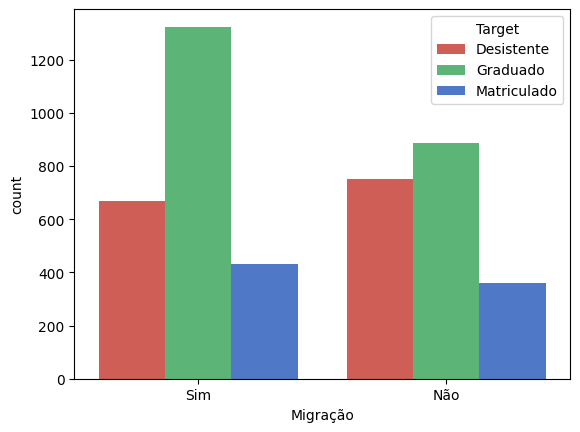

In [23]:
sns.countplot(x='Migração', hue='Target', data=df)
plt.show()


In [24]:
df['Necessidades educacionais especiais'].value_counts(normalize=True)*100


Não    98.847197
Sim     1.152803
Name: Necessidades educacionais especiais, dtype: float64

In [25]:
df.groupby('Target')['Necessidades educacionais especiais'].value_counts(normalize=True)*100


Target       Necessidades educacionais especiais
Desistente   Não                                    98.803659
             Sim                                     1.196341
Graduado     Não                                    98.958805
             Sim                                     1.041195
Matriculado  Não                                    98.614610
             Sim                                     1.385390
Name: Necessidades educacionais especiais, dtype: float64

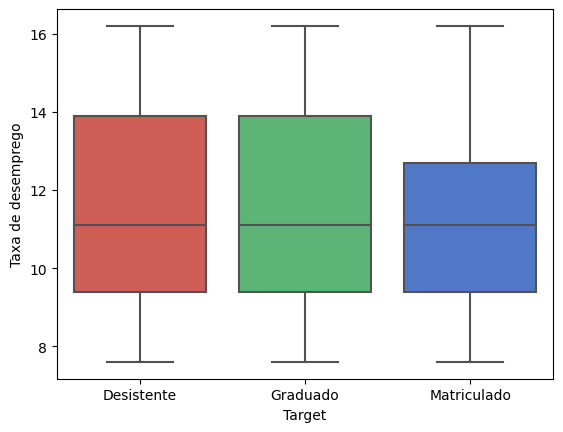

In [26]:
sns.boxplot(x='Target', y='Taxa de desemprego', data=df)
plt.show()


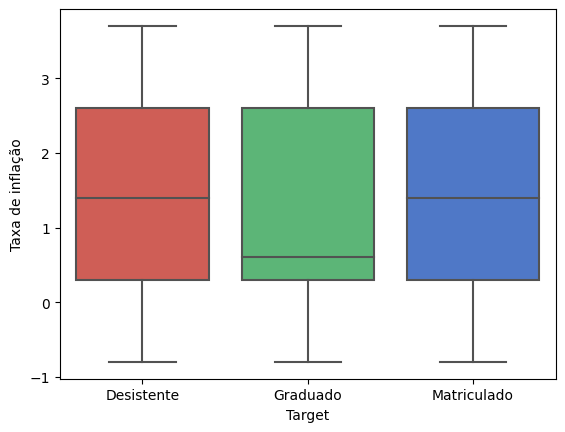

In [27]:
sns.boxplot(x='Target', y='Taxa de inflação', data=df)
plt.show()


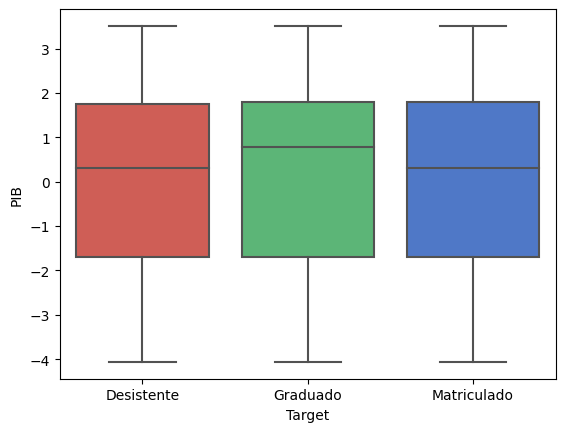

In [28]:
sns.boxplot(x='Target', y='PIB', data=df)
plt.show()


In [29]:
df['Qualificação prévia'].value_counts(normalize=True)*100


Educação secundária                                         84.018987
Curso de especialização tecnológica                          4.950271
Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente     3.661844
Educação superior - licenciatura                             2.848101
Outro - 11º ano de escolaridade                              1.017179
Educação superior - licenciatura (1º ciclo)                  0.904159
Curso técnico superior profissional                          0.813743
Educação superior - bacharelado                              0.519892
Frequência de educação superior                              0.361664
12º ano de escolaridade - não concluído                      0.248644
Educação superior - mestrado                                 0.180832
Educação básica 2º ciclo (6º/7º/8º ano) ou equivalente       0.158228
Educação superior - mestrado (2º ciclo)                      0.135624
11º ano de escolaridade - não concluído                      0.090416
10º ano de escolarid

##Preprocessamento

Primeiro vamos transformar as colunas categóricas em numéricas

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia']



Com o OneHotEncoder teremos as colunas categoricas para numéricas criando novas colunas para cada valor categórico, com 0s e 1s

In [32]:
encoder = OneHotEncoder(drop='if_binary') # não precisa criar colunas novas se for dois valores, pois dá pra transformar em 0 e 1
df_categorico = df[colunas_categoricas]
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),columns=encoder.get_feature_names_out(colunas_categoricas))
df_final = pd.concat([df.drop(colunas_categoricas,axis=1),df_encoded],axis=1)

In [33]:
df_final

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No gráfico acima é possível observar que os dados possuem escalas diferentes, exemplo: idade vai de 17 a 70 enquanto as taxas de inflação e PIB tem outros intervalos. Se estivessemos usando KNN precisaríamos normalizar, mas como estamos usando a árvore, nós não normalizamos pois pode piorar o modelo.

##Utilizando o modelo

In [34]:
X = df_final.drop('Target',axis=1)
y = df_final['Target']

separação dos dados

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_val)
print(f'Acurácia de treino:{model_rf.score(X_train,y_train)}')
print(f'Acurácia de validação:{model_rf.score(X_val,y_val)}')

Acurácia de treino:0.9975177304964539
Acurácia de validação:0.7787234042553192


In [39]:
model_rf = RandomForestClassifier(random_state=0,max_depth=10)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_val)
print(f'Acurácia de treino:{model_rf.score(X_train,y_train)}')
print(f'Acurácia de validação:{model_rf.score(X_val,y_val)}')

Acurácia de treino:0.8946808510638298
Acurácia de validação:0.7755319148936171


####Conhecendo GradientBoostingClassifier

Faz parte da família de algoritmos de impulso (boosting) e é conhecido por sua capacidade de melhorar gradualmente o desempenho do modelo, combinando várias árvores de decisão fracas em um modelo mais robusto e preciso.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_val)
print(f'Acurácia de treino: {modelo_gb.score(X_train, y_train)}')
print(f'Acurácia de validação: {modelo_gb.score(X_val, y_val)}')


Acurácia de treino: 0.8411347517730496
Acurácia de validação: 0.7702127659574468


Testando o balanceamento no GradientBoostingClassifier

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.83      0.74      0.78       302
    Graduado       0.82      0.89      0.85       469
 Matriculado       0.50      0.47      0.49       169

    accuracy                           0.76       940
   macro avg       0.71      0.70      0.71       940
weighted avg       0.76      0.76      0.76       940



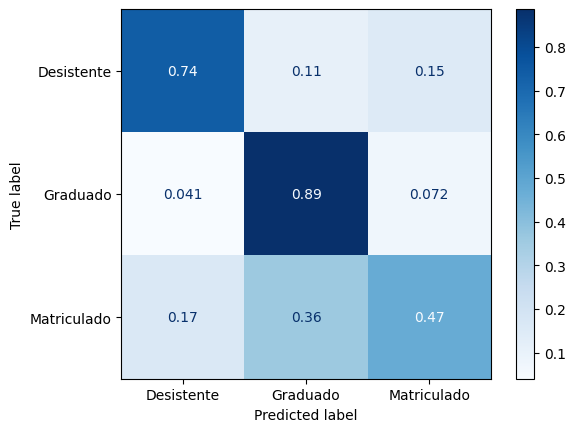

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

oversample = SMOTE(random_state=0)
X_balanced_gb, y_balanced_gb = oversample.fit_resample(X_train, y_train)

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_balanced_gb, y_balanced_gb)
y_pred_gb = modelo_gb.predict(X_val)

ConfusionMatrixDisplay.from_estimator(modelo_gb, X_val, y_val, normalize = 'true', cmap = 'Blues');

report_gb = classification_report(y_val, y_pred_gb)
print("Relatório de Classificação:\n", report_gb)


###Matriz de confusão

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
matriz_confusao = confusion_matrix(y_val,y_pred)

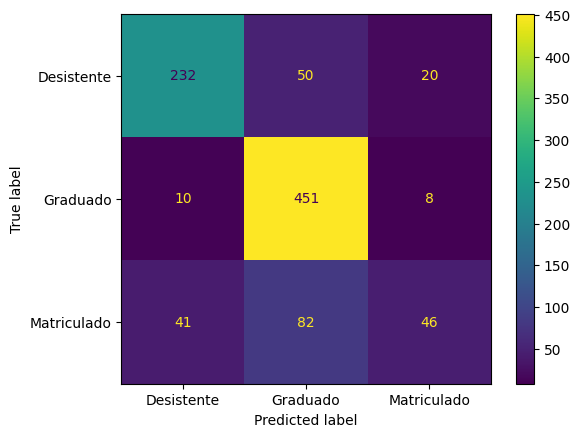

In [44]:
visualization = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,display_labels=model_rf.classes_)
visualization.plot()

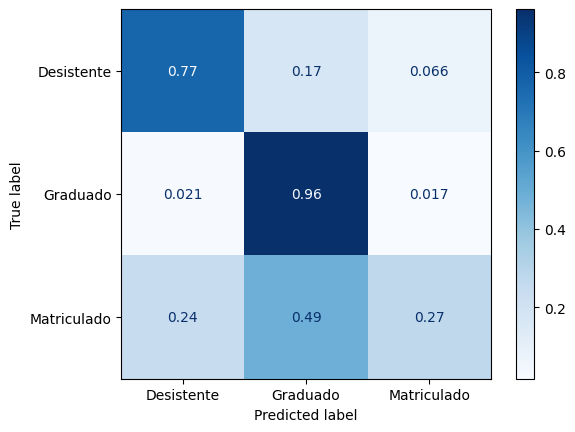

In [45]:
visu_normalized = ConfusionMatrixDisplay.from_predictions(y_val,y_pred,normalize='true',cmap='Blues')

In [46]:
conf_matrix = confusion_matrix(y_val, y_pred, normalize='true')
print(f"Com o gráfico normalizado podemos ver que {conf_matrix[0][0].round(2)}% dos desistentes são realmente desistentes, porém {conf_matrix[0][1].round(2)}% são desistentes e foram marcados como graduados")
print(f"Dos graduados {conf_matrix[1][1].round(2)}% foram marcados de forma correta")
print(f"Dos matriculados {conf_matrix[2][2].round(2)}% foram marcados de forma correta, enquanto {conf_matrix[2][0].round(2)}% foram marcados como desistentes e {conf_matrix[2][1].round(2)}% foram marcados como graduado")

Com o gráfico normalizado podemos ver que 0.77% dos desistentes são realmente desistentes, porém 0.17% são desistentes e foram marcados como graduados
Dos graduados 0.96% foram marcados de forma correta
Dos matriculados 0.27% foram marcados de forma correta, enquanto 0.24% foram marcados como desistentes e 0.49% foram marcados como graduado


In [47]:
from sklearn.metrics import classification_report

In [48]:
report = classification_report(y_val,y_pred)
print('relatório de classificação: \n',report)

relatório de classificação: 
               precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.62      0.27      0.38       169

    accuracy                           0.78       940
   macro avg       0.74      0.67      0.68       940
weighted avg       0.76      0.78      0.75       940



precision: instâncias classificadas como positivas que são verdadeiramente positivas, assim tendo menos falsos positivos

recall: nstâncias verdadeiramente positivas que foram corretamente identificadas pelo modelo de forma que tenha menos falsos negativos

Balanceando o modelo

In [49]:
y_train.value_counts()

Graduado       1408
Desistente      906
Matriculado     506
Name: Target, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
oversample = SMOTE(random_state=0)

In [52]:
X_balanced, y_balanced = oversample.fit_resample(X_train,y_train)

In [53]:
y_balanced.value_counts()

Desistente     1408
Graduado       1408
Matriculado    1408
Name: Target, dtype: int64

In [54]:
model = RandomForestClassifier(random_state=0,max_depth=10)
model.fit(X_balanced,y_balanced)
y_pred_balanced = model.predict(X_val)

              precision    recall  f1-score   support

  Desistente       0.87      0.72      0.79       302
    Graduado       0.81      0.87      0.84       469
 Matriculado       0.49      0.54      0.52       169

    accuracy                           0.76       940
   macro avg       0.72      0.71      0.71       940
weighted avg       0.77      0.76      0.76       940



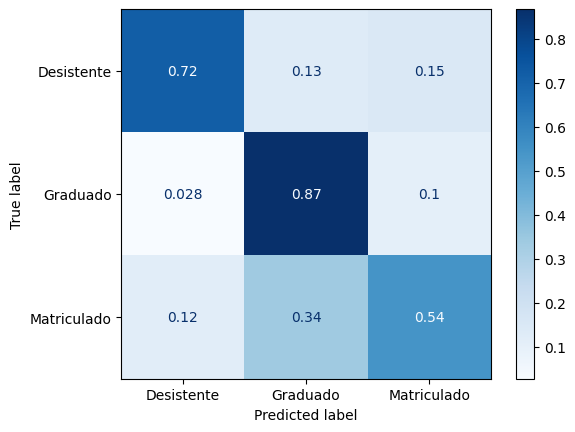

In [55]:
print(classification_report(y_val,y_pred_balanced))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred_balanced,normalize='true',cmap='Blues')

In [56]:
from imblearn.pipeline import Pipeline as imbpipeline
model = RandomForestClassifier(random_state=0, max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('randomforest', model)])


In [57]:
from sklearn.model_selection import cross_validate,StratifiedKFold

In [58]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

shuffle = embaralha os dados

In [59]:
cv_results = cross_validate(pipeline,X,y,cv=skf,scoring='recall_weighted')
cv_results['test_score']

array([0.7712766 , 0.73138298, 0.74601064, 0.76462766, 0.75930851])

In [60]:
media = cv_results['test_score'].mean()
desvio_padrao = cv_results['test_score'].std()
print(f'intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')


intervalo de confiança: [0.7260451940120762, 0.782997359179413]


Testar o modelo

In [61]:
X_balanced, y_balanced = oversample.fit_resample(X_train,y_train)

              precision    recall  f1-score   support

  Desistente       0.87      0.74      0.80       213
    Graduado       0.82      0.85      0.83       332
 Matriculado       0.45      0.53      0.49       119

    accuracy                           0.76       664
   macro avg       0.71      0.71      0.71       664
weighted avg       0.77      0.76      0.76       664



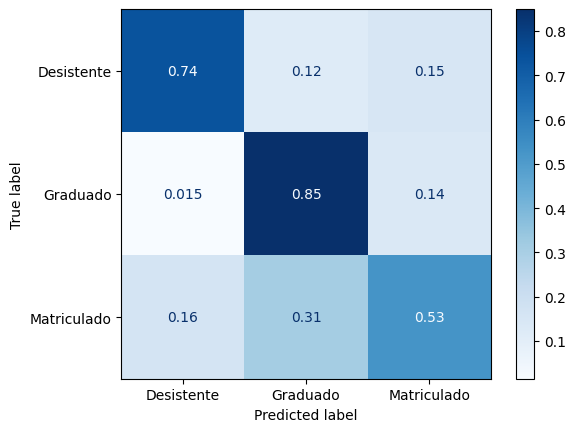

In [62]:
model = RandomForestClassifier(random_state=0,max_depth=10)
model.fit(X_balanced,y_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='true',cmap='Blues')

##Desafio


In [63]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/vqrca/classificacao_multiclasse/main/Dados/df_vinho.csv')


In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


In [65]:
X = df.drop('qualidade', axis=1)
y = df['qualidade']


In [66]:
from sklearn.model_selection import train_test_split

X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, stratify=y, random_state=0)


In [67]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=0, max_depth=5)
modelo_rf.fit(X_treino, y_treino)
y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val, y_val)}')


Acurácia de treino: 0.8868360277136259
Acurácia de validação: 0.8304498269896193


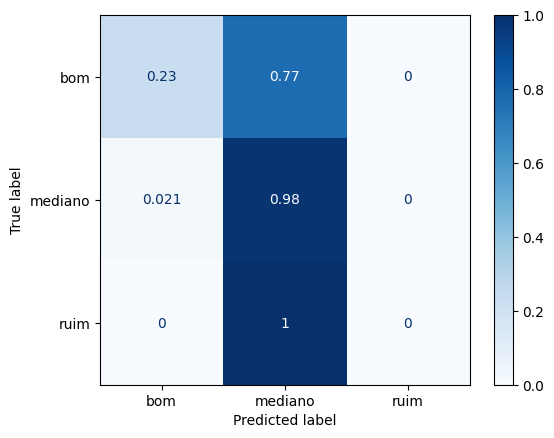

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(modelo_rf, X_val, y_val, normalize = 'true', cmap = 'Blues');


In [69]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print("Relatório de Classificação:\n", report)


Relatório de Classificação:
               precision    recall  f1-score   support

         bom       0.64      0.23      0.34        39
     mediano       0.84      0.98      0.90       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.83       289
   macro avg       0.49      0.40      0.41       289
weighted avg       0.77      0.83      0.78       289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [70]:
y_treino.value_counts()


mediano    709
bom        117
ruim        40
Name: qualidade, dtype: int64

              precision    recall  f1-score   support

         bom       0.36      0.77      0.49        39
     mediano       0.92      0.57      0.70       236
        ruim       0.14      0.57      0.22        14

    accuracy                           0.60       289
   macro avg       0.47      0.64      0.47       289
weighted avg       0.80      0.60      0.65       289



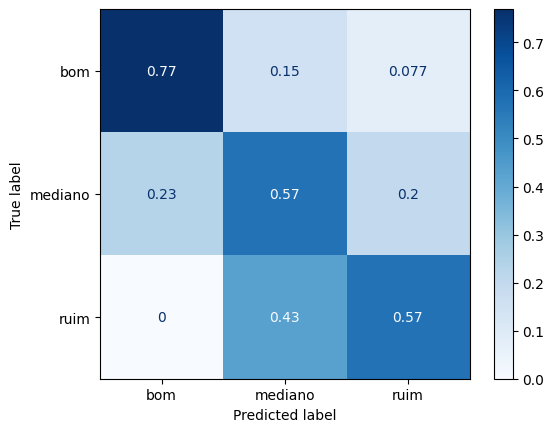

In [71]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)
modelo = RandomForestClassifier(random_state=0, max_depth=5)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');


In [72]:
from imblearn.pipeline import Pipeline as imbpipeline
modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])


In [73]:
from sklearn.model_selection import cross_validate, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']


array([0.76190476, 0.77489177, 0.72727273, 0.76190476, 0.76190476])

In [74]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')


Intervalo de confiança: [0.7256465992821026, 0.7895049158694125]


              precision    recall  f1-score   support

         bom       0.49      0.61      0.54        28
     mediano       0.90      0.83      0.86       167
        ruim       0.31      0.56      0.40         9

    accuracy                           0.78       204
   macro avg       0.57      0.66      0.60       204
weighted avg       0.82      0.78      0.80       204



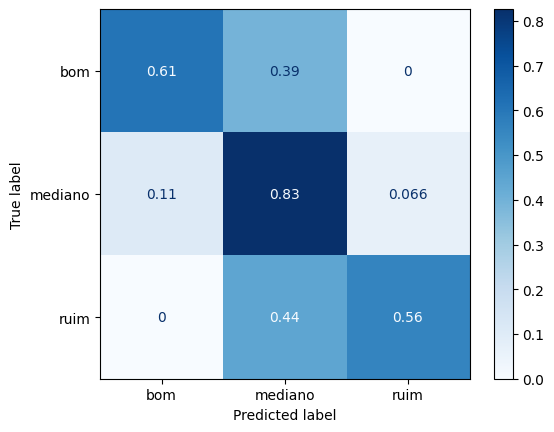

In [75]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');
